## KGE Model Training

Train knowledge graph embedding (KGE) models, using [OpenKE's implementation](https://github.com/thunlp/OpenKE).

In [18]:
import numpy as np

from libs.utils import Timer, now
from libs.utils.logging import Tee

import model.OpenKE2.config as config

from params import Params
            
params = Params(
         model="TransE",
         n_epochs=300,
         dim=40,
         lr=0.001,
         dataset="data/iimb/processed/",
         embedding_dir="data/iimb/embeddings/",
         model_dir="data/iimb/models/",
         save_model=False,
         use_module="OpenKE2",
         #optim="Adagrad"
)
params.save()
logger = Tee("testlog.txt")

with logger:
    Model = params.load_model()
    print("Using model <{}>".format(params.model))

    # -- Config --

    print("Initializing...")
    with Timer("Model initialized in {}.\n"):
        con = config.Config()
        #Input training files from benchmarks/FB15K/ folder.

        con.set_in_path(params.data_dir)
        con.set_test_triple_classification(True)
        con.set_test_link_prediction(True)

        con.set_work_threads(8)
        con.set_train_times(params.n_epochs)
        con.set_nbatches(params.n_batches)
        con.set_alpha(params.lr)
        con.set_margin(params.margin)
        con.set_bern(params.use_bern)
        con.set_dimension(params.dim)
        con.set_ent_neg_rate(params.ent_neg_rate)
        con.set_rel_neg_rate(params.rel_neg_rate)
        con.set_opt_method(params.optim)
        #con.set_early_stopping(params.early_stopping)

        con.set_log_on(True)

        if params.use_alpha:
            con.set_lmbda(params.alpha)

        if params.save_model:
            con.set_export_files(params.export_files)
            con.set_out_files(params.out_files)

        con.init()        
        con.set_model(Model)


    # -- Training --

    start_tag = "<TRAIN>"
    end_tag = "</TRAIN>"

    with Timer("Model trained in {}.\n"):
        print("Training started at {}".format(now()))
        print(start_tag)
        con.run()
        print(end_tag)

    # -- Saving --

    print("\nSaving model...")
    with Timer("Embedding matrices saved in {}"):
        embeddings = con.get_parameters("numpy")
        for k, arr in embeddings.items():
            print(k, arr.shape)
            fname = params.embedding_name(k)
            np.save(fname, arr)
            print(k, "saved in", fname, "\n")

Params saved in <data/iimb/embeddings/TransE_40d_300e/params.txt>
Using model <TransE>
Initializing...
Model initialized in 0:00:00.763989.

Training started at 11:15:39.264464
<TRAIN>
Epoch: 0, loss: 1.143289566040039, time: 0.04709506034851074
Epoch: 1, loss: 1.1331086158752441, time: 0.007773876190185547
Epoch: 2, loss: 1.1289640665054321, time: 0.00785970687866211
Epoch: 3, loss: 1.1232893466949463, time: 0.007699489593505859
Epoch: 4, loss: 1.1230216026306152, time: 0.007742404937744141
Epoch: 5, loss: 1.117844820022583, time: 0.007614850997924805
Epoch: 6, loss: 1.1315796375274658, time: 0.0077877044677734375
Epoch: 7, loss: 1.110904574394226, time: 0.00775599479675293
Epoch: 8, loss: 1.1254427433013916, time: 0.0077550411224365234
Epoch: 9, loss: 1.0929532051086426, time: 0.007763862609863281
Epoch: 10, loss: 1.1252979040145874, time: 0.007776975631713867
Epoch: 11, loss: 1.1154310703277588, time: 0.0077588558197021484
Epoch: 12, loss: 1.0918961763381958, time: 0.007958650588989

Epoch: 147, loss: 0.8895937204360962, time: 0.010214567184448242
Epoch: 148, loss: 0.8706562519073486, time: 0.008038759231567383
Epoch: 149, loss: 0.8719505667686462, time: 0.00841665267944336
Epoch: 150, loss: 0.877379834651947, time: 0.007753610610961914
Epoch: 151, loss: 0.8737003207206726, time: 0.007852554321289062
Epoch: 152, loss: 0.8646279573440552, time: 0.007673978805541992
Epoch: 153, loss: 0.8796475529670715, time: 0.00784444808959961
Epoch: 154, loss: 0.8690273761749268, time: 0.007782697677612305
Epoch: 155, loss: 0.8635255098342896, time: 0.007711887359619141
Epoch: 156, loss: 0.8773170113563538, time: 0.007743120193481445
Epoch: 157, loss: 0.8654646277427673, time: 0.007837295532226562
Epoch: 158, loss: 0.8528973460197449, time: 0.007700920104980469
Epoch: 159, loss: 0.8671654462814331, time: 0.007801055908203125
Epoch: 160, loss: 0.8685036301612854, time: 0.007739067077636719
Epoch: 161, loss: 0.8452295064926147, time: 0.007792949676513672
Epoch: 162, loss: 0.87476140

Epoch: 275, loss: 0.8164529800415039, time: 0.011166810989379883
Epoch: 276, loss: 0.8040309548377991, time: 0.008041858673095703
Epoch: 277, loss: 0.817191481590271, time: 0.007877588272094727
Epoch: 278, loss: 0.8210654854774475, time: 0.008044242858886719
Epoch: 279, loss: 0.8388356566429138, time: 0.008995771408081055
Epoch: 280, loss: 0.8048896789550781, time: 0.007822513580322266
Epoch: 281, loss: 0.8180159330368042, time: 0.007872819900512695
Epoch: 282, loss: 0.8161072134971619, time: 0.007773399353027344
Epoch: 283, loss: 0.8179727792739868, time: 0.007858991622924805
Epoch: 284, loss: 0.8018255233764648, time: 0.008461713790893555
Epoch: 285, loss: 0.8076014518737793, time: 0.00839090347290039
Epoch: 286, loss: 0.7991949319839478, time: 0.007817506790161133
Epoch: 287, loss: 0.7880172729492188, time: 0.00783085823059082
Epoch: 288, loss: 0.8079911470413208, time: 0.0077342987060546875
Epoch: 289, loss: 0.8034465909004211, time: 0.007760763168334961
Epoch: 290, loss: 0.7986980

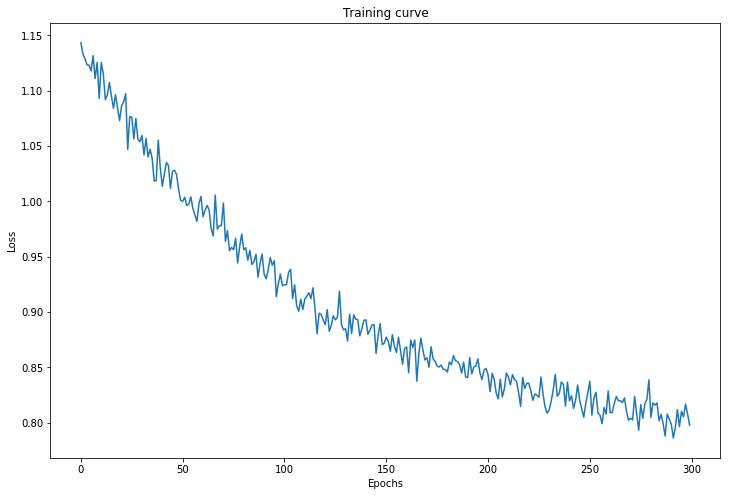

In [19]:
import matplotlib.pyplot as plt


def get_losses(logger, start_tag="<TRAIN>", end_tag="</TRAIN>"):
    s = logger.history()
    lines = s.split("\n")
    if start_tag not in lines or end_tag not in lines:
        return []
    start = lines.index(start_tag)
    end = lines.index(end_tag)
    read_loss = lambda line: float(line.split(",")[1].split(" ")[-1])

    return [read_loss(lines[i]) for i in range(start + 1, end)]


losses = get_losses(logger, start_tag, end_tag)

plt.figure(figsize=(12, 8))
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(f"{params.model} Training Curve")
plt.savefig(params.get_plot_name())
plt.show()